# 4.9 Part 2 Intro to Data Visualization with Python

## 4.9-2.1 import the necessary analysis and visualization libraries, then import your most up-to-date project data.

### Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### Importing data sets

In [2]:
# Creating path variable
path = r'C:\Users\lisa_\02\2023 Instacart Basket Analysis'

In [3]:
# Importing instacart_merge data set
instacart_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_merged.pkl'))

In [4]:
instacart_merged.shape

(32404859, 31)

In [5]:
instacart_merged.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
price_label                 object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
avg_price                  float64
spending_flag               object
med_days                   float64
frequency_flag              object
gender                      object
state                       object
age                          int64
date_joined                 object
num_of_dependents   

## 4.9-2.2 Create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

### Bar chart

Text(0.5, 1.0, 'Orders by Day of Week')

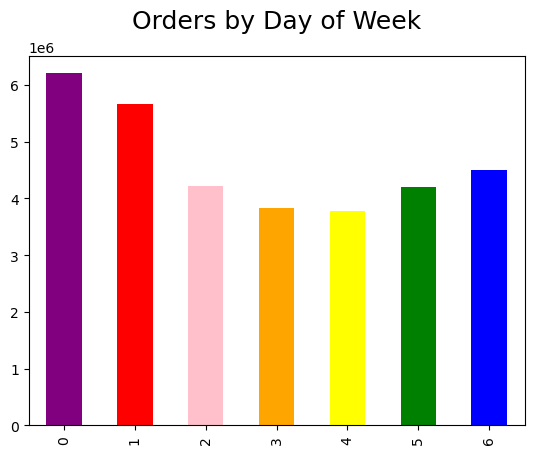

In [6]:
# Create bar chart according to index order and with colors
instacart_merged_bar = instacart_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])
plt.title('Orders by Day of Week', fontsize = 18, pad=20)

### Scatterplot

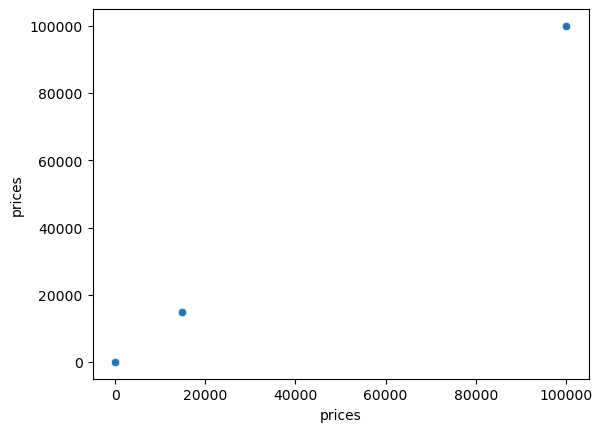

In [7]:
# Create scatterplot
instacart_merged_sp = sns.scatterplot(x = 'prices', y = 'prices',data = instacart_merged)

In [8]:
# Check for outliers
instacart_merged.loc[instacart_merged['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,med_days,frequency_flag,gender,state,age,date_joined,num_of_dependents,marital_status,income
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,High spender,6.0,Frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,High spender,6.0,Frequent customer,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,High spender,5.0,Frequent customer,Female,Hawaii,55,11/11/2018,2,married,230074
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,High spender,8.0,Frequent customer,Female,Hawaii,80,10/6/2019,2,married,233776
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,High spender,14.0,Regular customer,Male,Louisiana,59,8/23/2019,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,High spender,13.0,Regular customer,Male,Rhode Island,58,1/25/2019,1,married,207497
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,High spender,13.0,Regular customer,Female,Rhode Island,35,8/4/2018,0,single,86490
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,High spender,23.0,Non-frequent customer,Male,Rhode Island,78,5/8/2019,2,married,195077
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,High spender,6.0,Frequent customer,Female,South Carolina,48,1/18/2017,2,married,398880


In [9]:
# Mark outliers as missing
instacart_merged.loc[instacart_merged['prices'] >100, 'prices'] = np.nan

In [10]:
# Check max
instacart_merged['prices'].max()

25.0

### Histogram

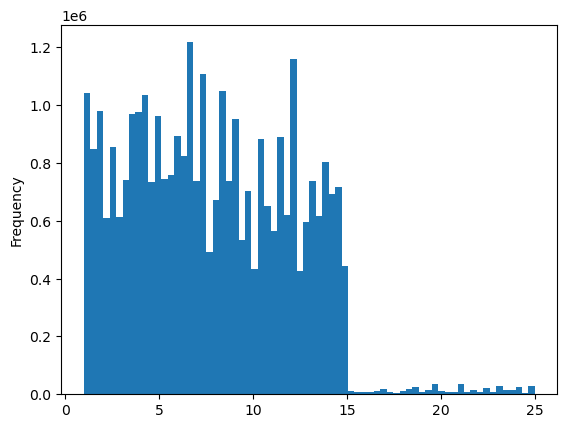

In [11]:
# Creating histogram
instacart_merged_hist = instacart_merged['prices'].plot.hist(bins = 70)

In [12]:
# Checking statistics
instacart_merged['prices'].describe()

count    3.239973e+07
mean     7.790994e+00
std      4.241809e+00
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      2.500000e+01
Name: prices, dtype: float64

### Line chart

In [13]:
# Create a list holding True/False values to test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(instacart_merged)) <= 0.7

In [14]:
# Check output
dev

array([False,  True, False, ...,  True,  True,  True])

In [15]:
# Produce list of random numbers
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [16]:
# Store 70% of the sample in the dataframe big
big = instacart_merged[dev]
small = instacart_merged[~dev]

In [17]:
# Store 30% of the sample in the dataframe small
small = instacart_merged[~dev]

In [18]:
# Check length
len(instacart_merged)

32404859

In [19]:
# Add big and small dataframes
len(big) + len(small)

32404859

In [20]:
# Reduce samples to prices and orders_day_of_week columns
df_2 = small[['orders_day_of_week','prices']]

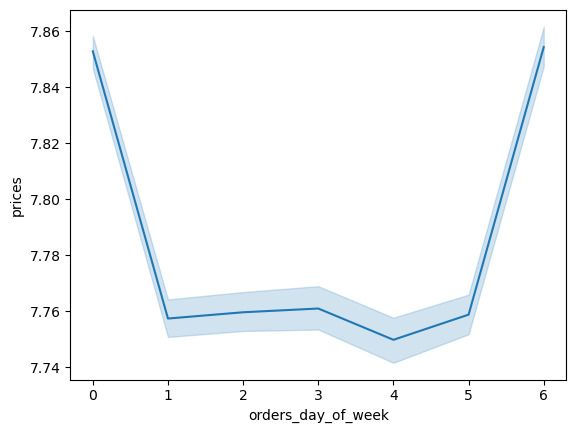

In [21]:
# Create line chart from sample
instacart_merged_line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

## 4.9-2.3 Provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

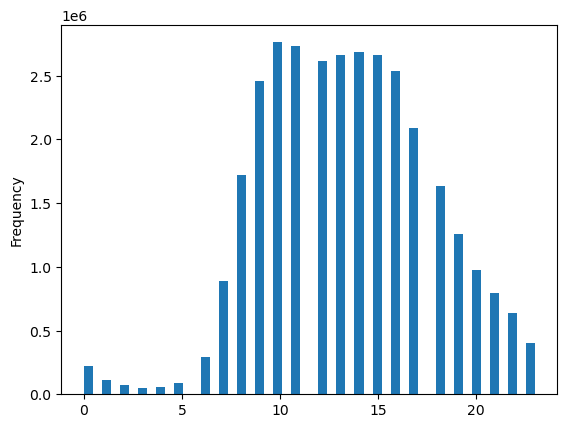

In [22]:
# Creating histogram
order_hour_of_day_hist = instacart_merged['order_hour_of_day'].plot.hist(bins = 50)

### - The histogram shows the amount of orders at each hour of the day. The results demonstrate that customers make the most orders at the hours from 9am to 4pm with the peak hour at 10am.

## 4.9-2.4 The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

(array([0, 1, 2]),
 [Text(0, 0, 'Regular customer'),
  Text(1, 0, 'Loyal customer'),
  Text(2, 0, 'New customer')])

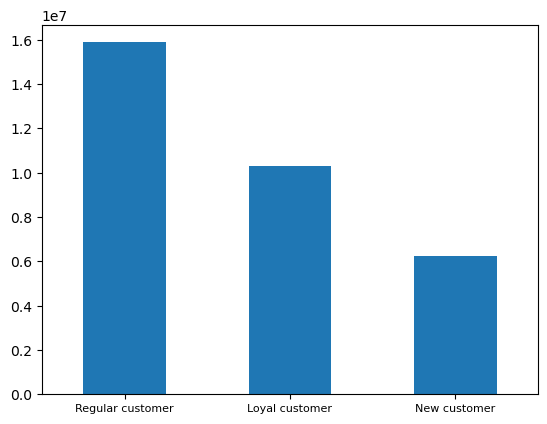

In [38]:
# Creating a bar chart
loyalty_flag_bar = instacart_merged['loyalty_flag'].value_counts().plot.bar()
plt.xticks(rotation=0, fontsize = 8)

## 4.9-2.5 Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. 

In [24]:
# Use samples from prices and orders_day_of_week columns
diff_in_exp = small[['order_hour_of_day','prices']]

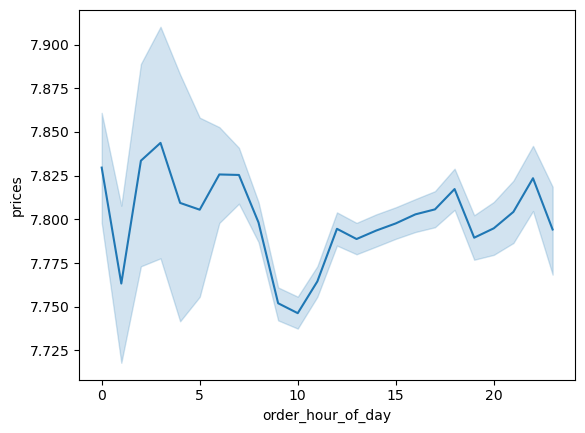

In [25]:
# Create line chart from sample
diff_in_exp_line = sns.lineplot(data = diff_in_exp, x = 'order_hour_of_day',y = 'prices')

## 4.9-2.6 Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns.

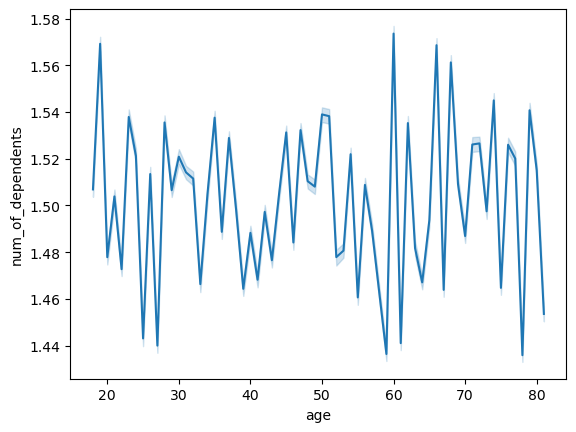

In [26]:
# Create line chart from sample
demographics_line = sns.lineplot(data = instacart_merged, x = 'age',y = 'num_of_dependents')

### - The line chart shows that there is no direct correlation between customer age and the number of their dependents. 

## 4.9-2.7 Explore whether there’s a connection between age and spending power (income).

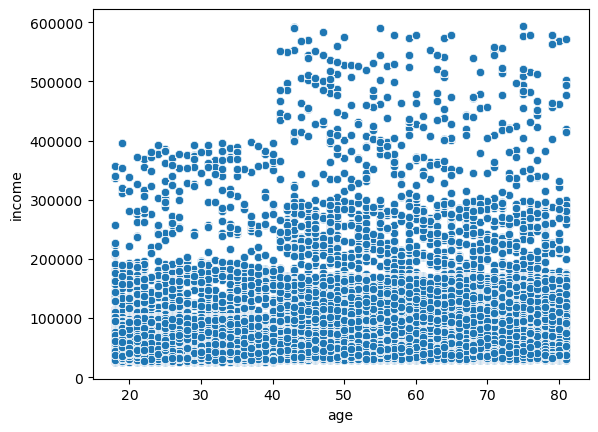

In [27]:
# Create scatterplot
age_spending_sp = sns.scatterplot(x = 'age', y = 'income',data = instacart_merged)

### - The scatterplot shows that there is a direct correlation between customer age and spending power. It shows that at age 40 and up, customers spend more on their orders.

## 4.9-2.8 Export your visualizations as “.png” files in your relevant project folder.

In [31]:
# Exporting to .png files
instacart_merged_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_merged_bar.png'))
instacart_merged_sp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_merged_sp.png'))
instacart_merged_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_merged_hist.png'))
instacart_merged_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'instacart_merged_line.png'))
order_hour_of_day_hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_hour_of_day_hist.png'))
loyalty_flag_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_bar.png'))
diff_in_exp_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'diff_in_exp_line.png'))
demographics_line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'demographics_line.png'))
age_spending_sp.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_spending_sp.png'))